In [76]:
import json
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

from collections import Counter, defaultdict

headers = {"User-Agent": "My User Agent 2.0"}

In [3]:
%%time
with open("data/profile2page.json", encoding="utf-8") as f:
    profile2page = json.load(f)

CPU times: total: 2min 5s
Wall time: 2min 18s


In [12]:
titlepart2href = defaultdict(Counter)

for profile, page in tqdm(profile2page.items()):
    soup = BeautifulSoup(page)
    
    for x in soup.find_all("a", {"class": "title"}, href=True):
        titlepart2href[x.get_text()].update([x["href"]])

100%|████████████████████████████████████████████████████████████████████████████| 52983/52983 [22:01<00:00, 40.08it/s]


In [19]:
len([href for titlepart, href in titlepart2href.items() 
     if (len(href) == 1) and (titlepart.endswith("…"))])

2986

In [21]:
len([href for titlepart, href in titlepart2href.items() 
     if (len(href) == 1) and (not titlepart.endswith("…"))])

13897

In [22]:
with open("data/titlepart2href.json", "w", encoding="utf-8") as fw:
    json.dump(
        {titlepart: dict(href) for titlepart, href in titlepart2href.items()}
        , fw
    )

# Short urls

https://mydramalist.com/9025

In [2]:
with open("data/href2dramapage.json", encoding="utf-8") as f:
    hrefs = json.load(f).keys()

In [25]:
nums = Counter([int(href[1:].split("-")[0]) for href in hrefs])
nums.most_common(5)

[(8411, 2), (710067, 1), (737587, 1), (10632, 1), (702899, 1)]

In [29]:
len(nums)

19461

In [27]:
stoptext = "The requested page was not found"
stoptext in requests.get(f"https://mydramalist.com/{max(nums)}", headers=headers).text

True

In [30]:
nums2go = sorted(
    set(range(max(nums))) - set(nums)
)
len(nums2go)

725031

In [89]:
# num2dramapage = {}

progress_bar = tqdm(nums2go)

for i in progress_bar:
    
    if (699900 < i < 700_000) and (i not in num2dramapage):
        page = requests.get(f"https://mydramalist.com/{i}", headers=headers)
        
        if stoptext not in page.text:
            num2dramapage[i] = page.text
            
        if not (i % 100):
            progress_bar.set_description(f"Current num: {i};\t{len(num2dramapage)} of pages saved")

Current num: 699900;	12079 of pages saved: 100%|██████████████████████████████| 725031/725031 [38:10<00:00, 316.53it/s]


In [90]:
len(num2dramapage)

12079

In [95]:
# %%time
# with open("data/num2dramapage.json", "w", encoding="utf-8") as fw:
#     json.dump(num2dramapage, fw, ensure_ascii=False)

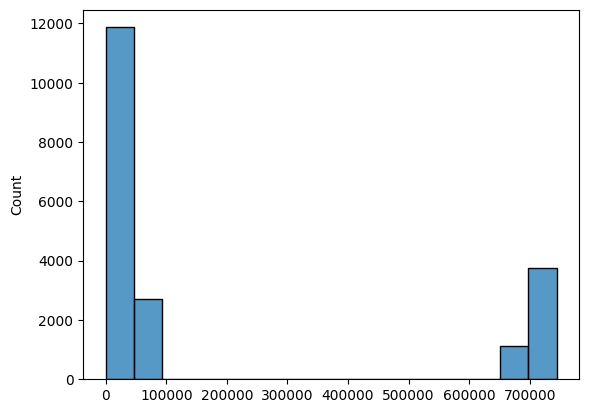

In [101]:
import seaborn as sns

sns.histplot(list(nums));

In [62]:
len(
    [n for n in nums if 81_000 < n < 680_000]
)

0

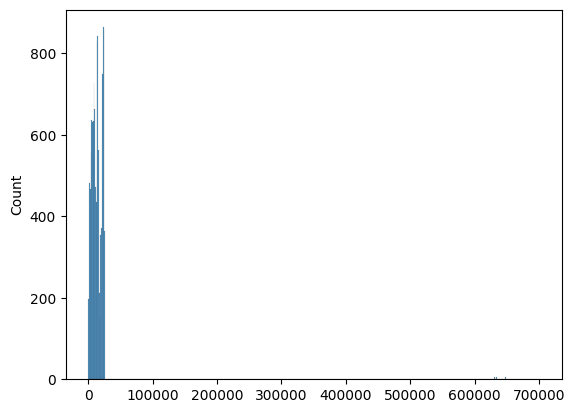

In [98]:
sns.histplot(list(num2dramapage.keys()));

In [125]:
for num, dramapage in num2dramapage.items():
    soup = BeautifulSoup(dramapage)
    
    res = soup.find_all("div", {"class": "box-header box-navbar mdl-component"})
    assert len(res) == 1
    href = res[0].find("a", href=True)["href"]
    break

In [126]:
href

'/35-spin-kick'